### **TO CREATE A MODEL THAT CAN PREDICT THE TYPE OF WINE BY USING THE LOGISTIC REGRESSION**

In [30]:
#defining a class

class LRegression():
    def __init__(self, learning, itera):
        self.learning  = learning
        self.itera = itera

    def fit(self, x, y):
        self.x = x
        self.y = y
        self.m, self.n = x.shape
        self.w = np.zeros(self.n)
        self.b = 0

        y_pred = 1.0 / (np.exp(-(self.x.dot(self.w) + b)))

        for i in range(self.itera):
            self.updates()

    def updates(self):
        y_pred = 1.0 / (np.exp(-(self.x.dot(self.w) + b)))
        dw = (1 / self.m) * (np.dot(self.x.T, (y_pred - self.y)))
        db = (1 / self.m) * (np.sum(y_pred - self.y))

        self.w -= self.learning * dw
        self.b -= self.learning * db

    def predict(self, x):
        y_pred = 1.0 / (np.exp(-(x.dot(self.w) + b)))
        y_pred = np.where( y_pred > 0.5, 1, 0)
        return y_pred


In [31]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/kaggle dataset/WineQuality.csv')
df.dropna()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32480,2838,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6,White Wine
32481,6414,6.6,0.360,0.52,11.3,0.046,8.0,110.0,0.99660,3.07,0.46,9.4,5,White Wine
32482,1126,6.3,0.200,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,6,White Wine
32483,2924,6.2,0.200,0.33,5.4,0.028,21.0,75.0,0.99012,3.36,0.41,13.5,7,White Wine


In [32]:
# labeling the types of wine in numerical form

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['wine_type'] = le.fit_transform(df.Type)
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,wine_type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine,1
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine,1
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine,1
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine,1
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine,1


In [33]:
# storing the data in np array

ng = df.drop(columns = 'wine_type', axis = 1)
gn = ng.drop(columns = 'Unnamed: 0', axis = 1)
x = gn.drop(columns = 'Type', axis =1)
m, ne = x.shape
w = np.zeros(ne)
b = 0
y_price = np.array(df["wine_type"])
n = len(y_price)

In [34]:
# normalizing the data

from sklearn.preprocessing import StandardScaler
gf = StandardScaler()
gf.fit(x)
standardized_data = gf.transform(x)
x = standardized_data


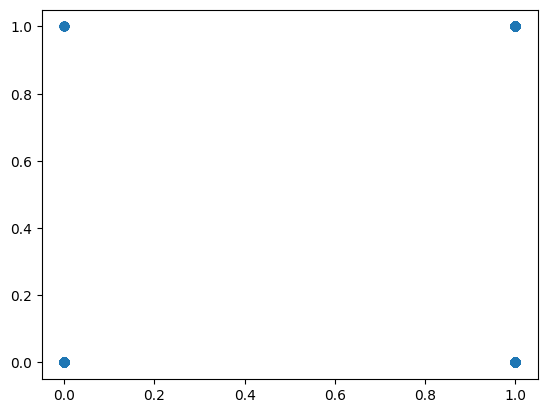

In [28]:
#applying the Logistic Regression function

gef = LRegression(0.5, 10000)
gef.fit(x, y_price)
alphae = gef.predict(x)

# ploting the values

plt.scatter(alphae, y_price)
plt.show()

In [29]:
# measuring the accuracy

from sklearn.metrics import accuracy_score
print(accuracy_score(y_price, alphae))

0.9197167923657072
